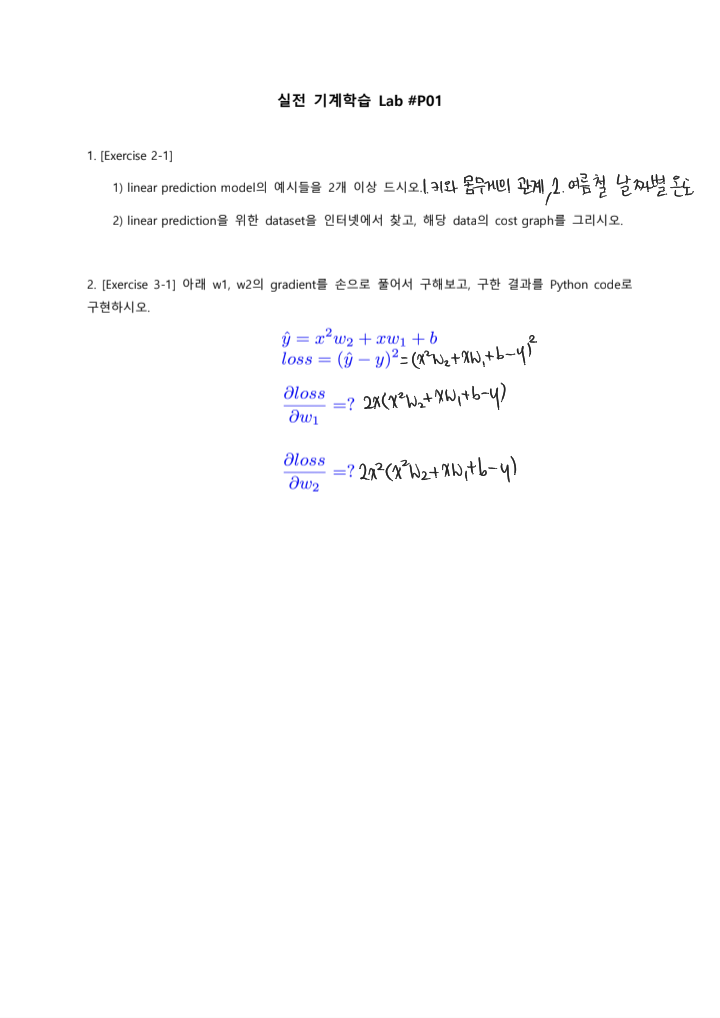

<ipython-input-34-f7830aecf683>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_temperature.csv')
<ipython-input-34-f7830aecf683>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_6 = df_kor[(data_frame['Year'] == 2019) & (data_frame['Month'] == 6)]


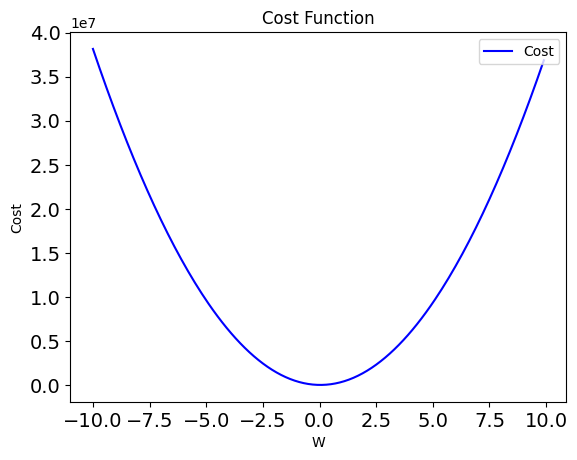

In [34]:
#1 - 2
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
tf.disable_v2_behavior()

data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/city_temperature.csv')

df_kor = data_frame[data_frame['City'] == 'Seoul']
df_6 = df_kor[(data_frame['Year'] == 2019) & (data_frame['Month'] == 6)]

def makeX(dataset):
    x_data = []
    for i in dataset:
        if i[5] <= 9:
            i[5] = str(0) + str(i[5])
            
        data = str(i[4]) + str(i[5])

        x_data.append(float(data))
    return x_data

def makeY(dataset):
    y_data = []
    for i in dataset:
        y_data.append( float("%0.2f"%((i[7] - 32) / 1.8)))
    return y_data

dataset = df_6.values.tolist()
x_data = makeX(dataset)
y_data = makeY(dataset)

m = len(x_data)
W = tf.placeholder(tf.float32)
hypothesis = tf.multiply(W, x_data)
cost = tf.reduce_sum(tf.pow(hypothesis - y_data, 2)) / m

W_val = []
cost_val = []

with tf.Session() as sess:
  for i in range(-100, 100):
    W_val.append(i * 0.1)
    cost_val.append(sess.run(cost, feed_dict = {W: i * 0.1}))

plt.plot(W_val, cost_val, 'b', label = 'Cost')
plt.title('Cost Function')
plt.xlabel('W')
plt.ylabel('Cost')
plt.legend(loc = 'upper right')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

```python
#2
def foward(w1, w2, x, b):
  return x ** 2 * w2 + x * w1 + b

def loss(w1, w2, x, b, y):
  y_pred = forward(w1, w2, x, b)
  return (y_pred - y) ** 2

def gradient1(w1, w2, x, b, y):
  return 2 * x * (foward(w1, w2, x, b) - y)

def gradient2(w1, w2, x, b, y):
  return 2 * x ** 2 * (forward(w1, w2, x, b) - y) 
```